# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [3]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

/home/masterg/anaconda3/envs/SMAI_A1/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


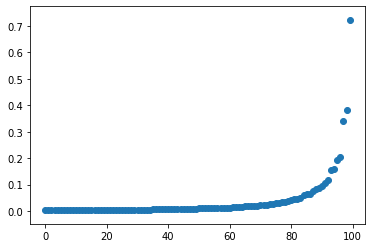

In [4]:
# Samples corresponding to the last digit of your roll number (plot a)
milabels = []
for i in range(0,len(train_labels)):
    if train_labels[i]==9:
        milabels.append(train_data[i])
milabels = np.array(milabels)
milabels = milabels.transpose()
values, vectors = np.linalg.eig(np.cov(milabels))
norm = np.linalg.norm(values)
values = values/norm
values.sort()
plt.scatter([i for i in range(100)],values[684:784])

                

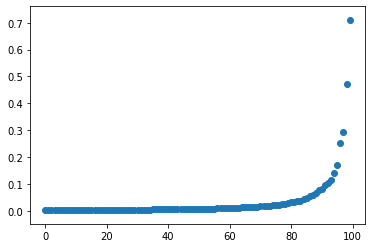

In [5]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
yolabels = []
for i in range(0,len(train_labels)):
    if train_labels[i]==0:
        yolabels.append(train_data[i])
yolabels = np.array(yolabels)
yolabels = yolabels.transpose()
values, vectors = np.linalg.eig(np.cov(yolabels))
norm = np.linalg.norm(values)
values = values/norm
values.sort()
plt.scatter([i for i in range(0,100)],values[684:784])


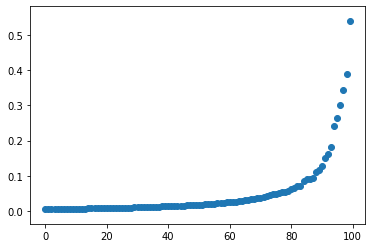

In [6]:
# All training data (plot c)
train_trans = train_data.transpose()
values, vectors = np.linalg.eig(np.cov(train_trans))
norm = np.linalg.norm(values)
values =values/norm
values.sort()
plt.scatter([i for i in range(100)],values[684:784])

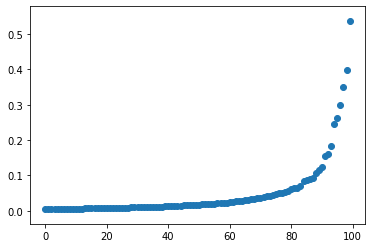

In [7]:
# Randomly selected 50% of the training data (plot d)
import random
random_data = np.copy(train_data)
random.shuffle(random_data)
half_data = train_data[0:3000]
half_data = np.transpose(half_data)
values, vectors = np.linalg.eig(np.cov(half_data))
norm = np.linalg.norm(values)
values = values/norm
values.sort()
plt.scatter([i for i in range(100)],values[684:784])

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
1. plots a and b are different. The 
2. plots b and c are different. Variance will be more b/w plots from all classes than for plots for only 0 which will affect eigen values
3. Ranks of the plots are the number of non-zero eigen values
    3.1. For a and b, rank is around 70
    3.2. For c and d, rank is around 90
---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---

1. There can be 256^784 images possible(assuming each value can range in 0-255). But if the images are binary, then there can be 2^784 images ≅ 1.017458257e236.

2. We have 6000/2^784x100% ≅ 5.897048e-231% available to us

3. For all the data, the plot would be similar to plot c
---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Multiplication with an orthonormal matrix is basically a rotation operation. So there would be no change in the eigen values, but the eigenvectors would be rotated in the same direction.

---

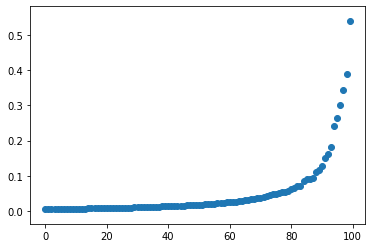

In [8]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

# code goes here
H = np.random.rand(784,784)
Q, R = np.linalg.qr(H)
cov_train = Q.dot(train_trans)
values, vectors = np.linalg.eig(np.cov(cov_train))
norm = np.linalg.norm(values)
values = values/norm
values.sort()
plt.scatter([i for i in range(100)],values[684:784])

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---

When rank(AB) = min (rank(A),rank(B)). So then the number of non-zero eigen values will be 1 or 2. So the spectrum will be flat with 1 or 2 peaks.

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

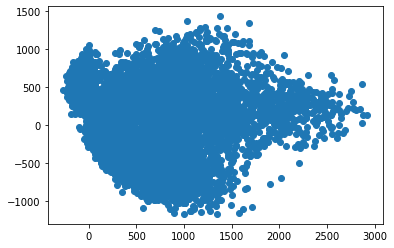

In [9]:
# Plotting code here
values,vectors = np.linalg.eig(np.cov(np.transpose(train_data)))
indices = values.argsort()[::-1]
indices = indices.real
values = values[indices]
vectors = vectors[:,indices]
ax1 = np.dot(train_data,vectors[:,0])
ax2 = np.dot(train_data,vectors[:,1])

plt.scatter(ax1,ax2)

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [10]:
# Print accuracy on the test set using MLE
values,vectors = np.linalg.eig(np.cov(np.transpose(train_data)))
indices = values.argsort()[::-1]
values = values[indices]
vectors = vectors[:,indices]
dim_red = np.dot(train_data,vectors[:,0:50])

test_red = np.dot(test_data,vectors[:,0:50])


# ind = train_labels.argsort()
# dim_labels = train_labels[ind]
# dim_red = dim_red[:,ind]
# means = []
# covs = []
# for i in range(10):
#     covs.append(np.cov(dim_red[:,i*600:(i+1)*600]))
# print(covs)


temp_data=[[],[],[],[],[],[],[],[],[],[]]
for i in range(len(dim_red)):
    temp_data[int(train_labels[i])].append(dim_red[i])

    
means=[]
covs=[]

for i in range(10):
    means.append(np.mean(temp_data[i],axis=0))
    covs.append(np.cov(np.transpose(temp_data[i])))

def multinorm(mean,sigma,x):
    var1 = np.dot(np.transpose(x-mean),np.dot(np.linalg.pinv(sigma),x-mean))
    numer = np.exp(np.dot(-0.5,var1))
    denom = np.power((np.power(2*np.pi,50)*np.linalg.det(sigma)),0.5)
    return numer/denom
    
accuracy = 0
for i in range(len(test_red)):
    norms = []
    for j in range(10):
        norms.append(multinorm(means[j],covs[j],test_red[i]))
    norms = np.array(norms)
    ranks = norms.argsort()
    if ranks[9] == test_labels[i]:
        accuracy += 1
print(accuracy/10) # same reason as knn in 1.3.4

94.7


In [11]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)
accuracy = 0
for i in range(len(test_red)):
    norms = []
    for j in range(10):
        norms.append(multinorm(means[j],covs[j],test_red[i])*0.1)   # for each label, P(θ) is 1/10 = 0.1. So for apriori estimation, we just multiply each by 0.1 
    norms = np.array(norms)
    ranks = norms.argsort()
    if ranks[9] == test_labels[i]:
        accuracy += 1
print(accuracy/10) # same reason as knn in 1.3.4

94.7


In [12]:
# Print accuracy using Bayesian pairwise majority voting method
def maha_dist(mean,sigma,x):
    return np.dot(np.transpose(x-mean),np.dot(np.linalg.pinv(sigma),x-mean))

accuracy=0
for i in range(len(test_red)):
    votes = [0,0,0,0,0,0,0,0,0,0]
    for j in range(9):
        for k in range(j+1,10):
            new_cov = (covs[j]+covs[k])/2
            if maha_dist(means[j],new_cov,test_red[i]) > maha_dist(means[k],new_cov,test_red[i]):
                votes[j]+=1
            else:
                votes[k]+=1
    votes=np.array(votes)
    indx = votes.argsort()
    if indx[0] == test_labels[i]:
        accuracy += 1
print(accuracy/10)

90.4


In [13]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
accuracy = 0
for i in range(len(test_red)):
    distances = []
    for j in range(10):
        distances.append(np.linalg.norm(means[j]-test_red[i]))
    distances=np.array(distances)
    indx = distances.argsort()
    if indx[0] == test_labels[i]:
        accuracy += 1
print(accuracy/10)

76.6


### 1.3.3 Question 4
Compare performances and salient observations

MLE and MAP has the best accuracy (94.7%) while Perpendicular bisector has the least (76.6%). Bayesian pairwise distance voting has(90.4%) accuracy. MAP and MLE have the same accuracy as the apriori prbabilities for each class are the same.

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [14]:
# Your code here
# Print accuracies with K = 1, 3, 7

def knn(k=1):
    accuracy = 0
    for i in range(len(test_data)):
        neighbours=[]
        for j in range(len(train_data)):
            neighbours.append((np.linalg.norm(test_data[i]-train_data[j]),train_labels[j]))
        neighbours.sort(key=lambda x:x[0])
        bucket = [0,0,0,0,0,0,0,0,0,0]
        for j in range(k):
            bucket[int(neighbours[j][1])]+=1
        max_index=-1
        max_value=0
        for j in range(10):
            if(bucket[j]>max_value):
                max_value = bucket[j]
                max_index = j
        if(max_index==test_labels[i]):
            accuracy+=1
    print(accuracy/10) # becuase 100 test cases and accuracy/1000*100%
knn()
knn(3)
knn(7)

90.7
91.6
91.6


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
- Accuracies are not the same as for larger k, we take into consideration more distant points from the actual data point. So that will affect the correctness of the prediction. If k==n, then our classifier will be totally random as all points in the dataset is considered a neighbour.
- To find the best accuracy, we can do a simple hill climb algorithm with decreasing step size
---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [15]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [16]:
all_data = np.vstack((mixed_data,train_data))
# for k=7
nn = []
for i in range(len(train_data)):
    neighbours = np.linalg.norm(all_data-train_data[i],axis=1)
    ind = neighbours.argsort()
    for k in range(7):
        nn.append(ind[k])
for i in range(len(mixed_data)):
    if i not in nn:
        print(i)

0
4
6
7
9
18


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---

for each in test_data, find the k nearest neighbours in the train_data. We normalize the distances of each and then apply the formula 
    $$ neatness = \frac{\sum w^i.x^i}{\sum w^i} $$
where $$ w^i = (1-norm~dist) $$

---    

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [17]:
# Your code here
# k=7
error = 0
for i in range(len(test_data)):
    neighbours = np.linalg.norm(train_data-test_data[i],axis=1)
    ind = neighbours.argsort()
    sum=0
    for j in range(7):
        sum += neighbours[ind[j]]
    neighbours = neighbours/sum
    numer=denom=0
    for k in range(7):
        numer+=(1-neighbours[ind[k]])*(train_labels[ind[k]]/10)
        denom+=(1-neighbours[ind[k]])
    error += np.absolute(test_labels[i]/10-(numer/denom))
print(error/1000)

0.043680038708632796


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---